# Portfolio4-Image-Clustering
## Qiaoyu Wang

### 0 Import

In [25]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
%matplotlib inline
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

### 1 load and resize the dataset

In [28]:
my_dataset_path = 'data'

In [5]:
!gallery-dl https://www.pinterest.co.uk/briannau21/ancient-greek-sculptures/

.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801572614392.png
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801571934362.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801571709830.png
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570873515.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776685.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776684.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776683.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776682.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776680.png
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776679.jpg
.\gallery-dl\pinterest\briannau21\Ancient greek sculptures\pinterest_56435801570776678.jpg

In [7]:
source_directory = 'gallery-dl/pinterest/briannau21/Ancient greek sculptures' 

file_names = os.listdir(source_directory)

for file_name in file_names:
    source_path = os.path.join(source_directory, file_name)
    shutil.move(source_path, my_dataset_path)

In [9]:
!gallery-dl https://www.pinterest.co.uk/wicky1739/ancient-greek-sculpture/

.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707566261273.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707566261266.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707566261255.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707565974890.png
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707565974883.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707565328499.png
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707565328487.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707564388877.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707563901271.jpg
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707563579742.png
.\gallery-dl\pinterest\wicky1739\Ancient greek sculpture\pinterest_815362707563579573.jpg
.\gallery-

[downloader.ytdl][error] Cannot import module 'youtube_dl'
[download][info] Trying fallback URL #1


In [10]:
source_directory = 'gallery-dl/pinterest/wicky1739/Ancient greek sculpture' 

file_names = os.listdir(source_directory)

for file_name in file_names:
    source_path = os.path.join(source_directory, file_name)
    shutil.move(source_path, my_dataset_path)

In [26]:
!gallery-dl https://www.pinterest.co.uk/8rain8bow/sculpture/

.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672306.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672305.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672299.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672291.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672290.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672286.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672285.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672280.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672278.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672277.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672276.jpg
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672275.png
.\gallery-dl\pinterest\8rain8bow\Sculpture\pinterest_464433780340672274.jpg
.\gallery-dl

[downloader.http][warning] HTTPSConnectionPool(host='i.pinimg.com', port=443): Read timed out. (read timeout=30) (1/5)
[downloader.http][warning] HTTPSConnectionPool(host='i.pinimg.com', port=443): Read timed out. (read timeout=30) (1/5)


In [17]:
source_directory = 'gallery-dl/pinterest/8rain8bow/sculpture' 

file_names = os.listdir(source_directory)

for file_name in file_names:
    source_path = os.path.join(source_directory, file_name)
    shutil.move(source_path, my_dataset_path)

In [26]:
path_to_images = "data/"
#image extension
file_types = ".jpg",'.png'
#Pick image size
img_height = 224
img_width = 224
#Is it rgb or black and white?
channels = 3

In [27]:
paths = []
for root, dirs, files in os.walk(path_to_images, topdown=False):
    for name in files:
        if any(file_type in name.lower() for file_type in file_types):
            paths.append(os.path.join(root, name))
            
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

# Load in images and apply transformations
dataset = [transform(Image.open(i).convert('RGB')) for i in paths]

# Stack all the tensor objects in a single tensor
dataset_tensor = torch.stack(dataset)

### 2 Load a pretrained model and get image features

In [28]:
# Load the pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)
model.eval()  

d:\conda\envs\introds\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\conda\envs\introds\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [29]:
# Predict
with torch.no_grad():
    pred = model(dataset_tensor)

x = pred.view(dataset_tensor.size(0), -1)

print(x.shape)

torch.Size([907, 1000])


### 3 Image Clustering

#### 3.1 Standardise and Reduce dimension

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
x = StandardScaler().fit_transform(x)

In [32]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

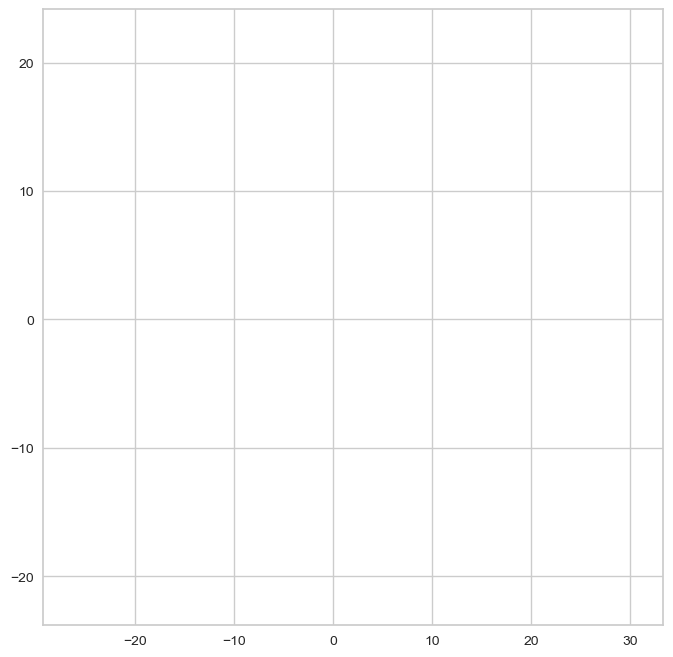

In [48]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [34]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

#### 3.2 Elbow Method

d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

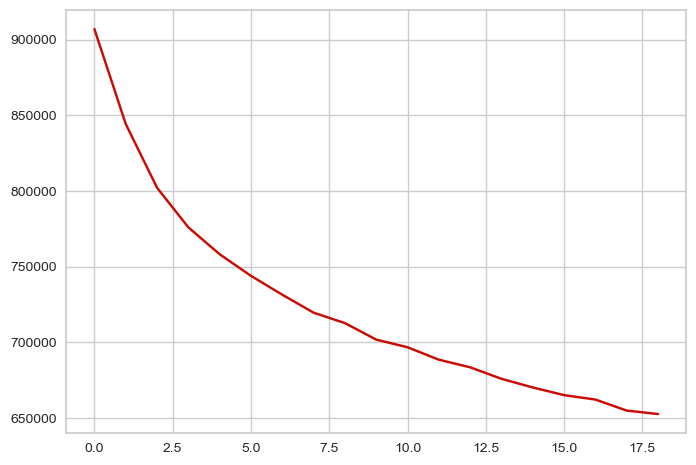

In [35]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


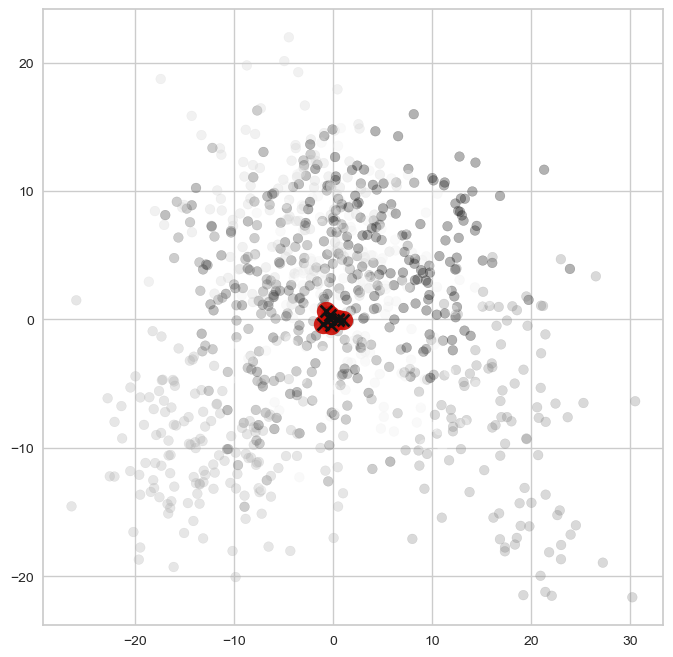

In [41]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

#### 3.3 Silhouette Method

In [37]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette Score: 0.09512869380877075


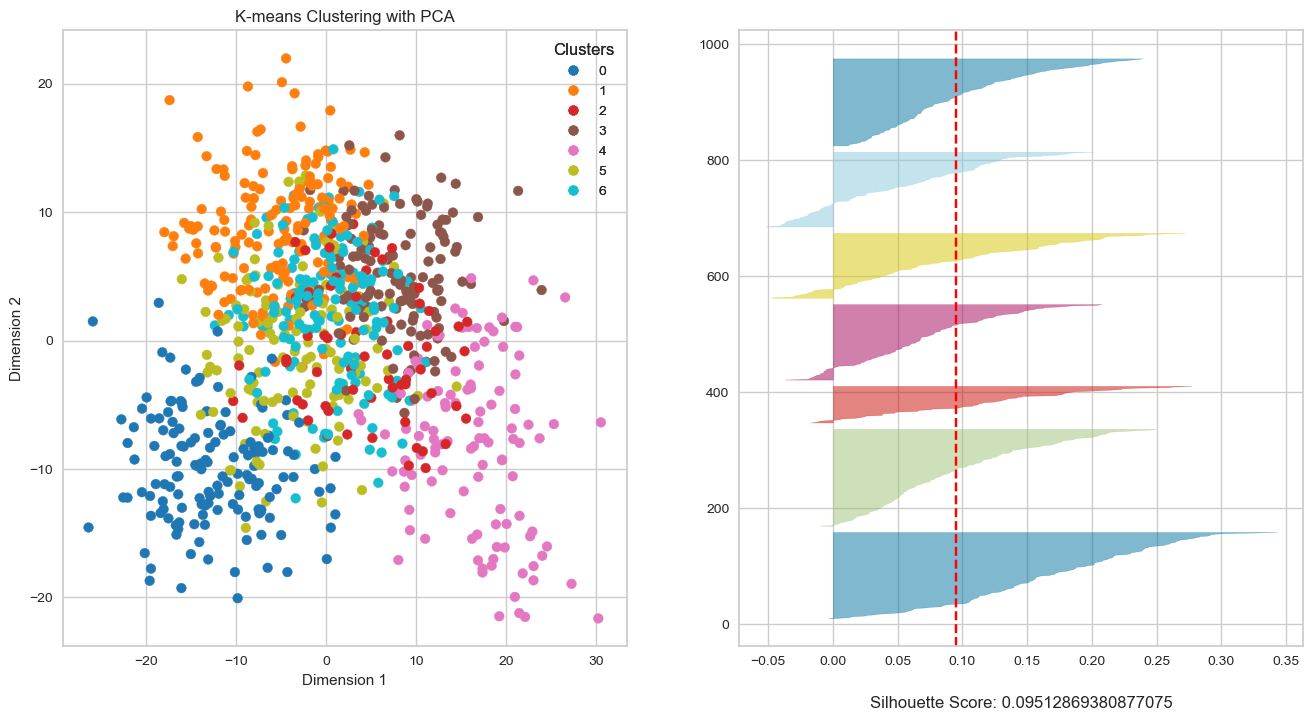

In [45]:
k = 7
num_dimensions = 20

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

# Calculate silhouette score
silhouette_avg = silhouette_score(x_less_dimensions, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot original scatter plot
scatter = ax1.scatter(x_less_dimensions[:, 0], x_less_dimensions[:, 1], c=kmeans.labels_, cmap='tab10')
legend = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
ax1.set_title('K-means Clustering with PCA')

# Add legend
ax1.add_artist(legend)

# Plot silhouette scores
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax2)
visualizer.fit(x_less_dimensions)

# Annotate silhouette score on the plot
ax2.text(0.5, -0.1, f'Silhouette Score: {silhouette_avg}', ha='center', fontsize=12, transform=ax2.transAxes)

plt.show()

#### 3.4 Examine CLusters

In [46]:
#Define this custom function to display images in grid
from PIL import Image
from PIL import ImageDraw 
from PIL import ImageFont
# font = ImageFont.truetype("../data/Arial.ttf", 24)
#Define custom function to display images
def image_grid(imgs, rows, cols, labels = False):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    draw = ImageDraw.Draw(grid)
    for i, img in enumerate(imgs):
        r = i//cols
        c = i%cols
        pt = (c*w, r*h)
        color = (255,255,255)
        grid.paste(img, box=pt)
        if labels:
            label = "Cluster "+str(r) 
            draw.text(pt,label,color)
    return grid

d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\conda\envs\introds\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[183 238 220 129 128 265 466  68 112 885 105  82 814 790 761 807 768 780
 316 876 576 774 899 639 674  23 527 678 454 607 498 575 499 537 508 544
 641 628 586  90 685 619]
(42, 3, 224, 224)


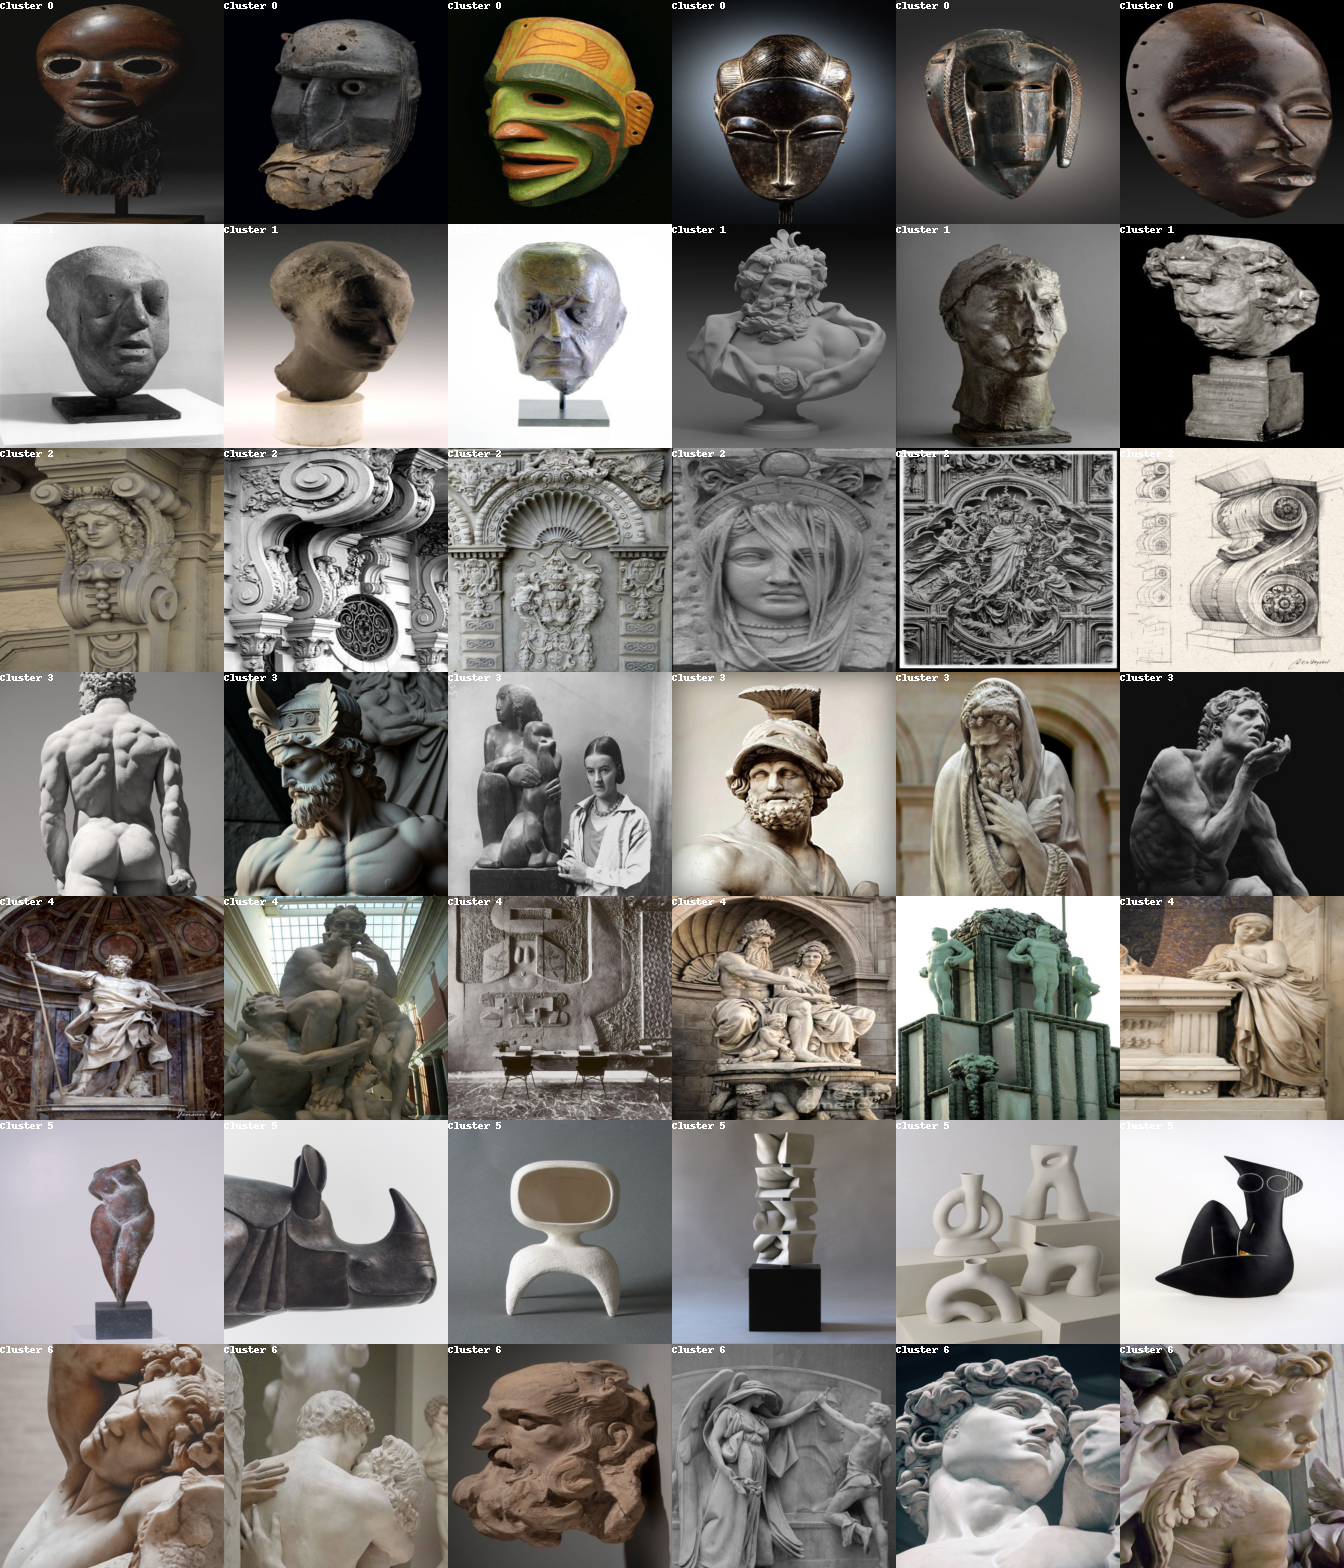

<Figure size 1000x1000 with 0 Axes>

In [47]:
#How many clusters?
k = 7
#Get image closest to the centre for each cluster
kmeans = KMeans(n_clusters=k, random_state=42)
#dist to each cluster center for each image
x_dist = kmeans.fit_transform(x_less_dimensions)
cols = 6
indexes = np.array([]).astype(int)
for i in range(k):
    #Get distances for a given cluster (for all images)
    cluster_dist = x_dist[:,i]
    #Sort ascending (shortest distance first) and take nearest 3
    cluster_indexes = cluster_dist.argsort(axis = 0)[:cols]
    indexes = np.concatenate((indexes,cluster_indexes))
print(indexes)

to_show = np.array(dataset)[indexes]
print(to_show.shape)
pil_images = [Image.fromarray((i.transpose(1, 2, 0) * 255).astype(np.uint8)) for i in to_show]
plt.figure(figsize=(10,10))

image_grid(pil_images, k, cols, True)